In [68]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/hong-kong-marathon-2016/challenge.csv')

The Purpose of this notebook is to explore if there are variations in the strategies adopted by the winners as compared to that of other people. 

For calculating this I have divided the race into the following 4 legs:
1. 0 - 10 Kms
2. 10 Kms - 21.0975 Kms (the half way point)
3. 21.0975 Kms - 30 Kms
4. 30 Kms - 42.195 Kms

I will calculate the average speeds of contestants in the above 4 legs to check for the strategies adopted.

In [3]:
def toTime(a):
    hr, mi, se = map(int, a.split(':'))
    # Returning time in seconds
    return (hr*3600) + (mi * 60) + se

df = df.dropna()

total_marathon_length = 42.195
half_way_length = total_marathon_length / 2
# Distributing the marathon into 4 legs and calculating length in meters for each leg
FirstPart = 10 * 1000
SecondPart = ((total_marathon_length / 2) - 10) * 1000
ThirdPart = ( 30 - (total_marathon_length / 2)) * 1000
FinalPart = (total_marathon_length - 30) * 1000

# Calculating the time in second for each leg
df['10KmSec'] = df['10km Time'].apply(toTime)
df['HalfWaySec'] = df['Half Way Time'].apply(toTime)
df['30KmSec'] = df['30km Time'].apply(toTime)
df['NetSec'] = df['Net Time'].apply(toTime)

#Calculating average speeds for each contestant in each of the legs
df['1st Leg'] = FirstPart / df['10KmSec']
df['2nd Leg'] = SecondPart / (df['HalfWaySec'] - df['10KmSec'])
df['3rd Leg'] = ThirdPart / (df['30KmSec'] - df['HalfWaySec'])
df['4th Leg'] = FinalPart / (df['NetSec'] - df['30KmSec'])

cols = ['1st Leg', '2nd Leg', '3rd Leg', '4th Leg']
df_reduced = df[['Overall Position'] + cols]

avg = df_reduced[cols].mean()
top20 = df_reduced[df_reduced['Overall Position'] < 21][cols].mean()

# List to store average time for various categories
Series_list = [top20]
# List to store names of the various categories
ColumnList = ['Top20']

max_overall = df_reduced['Overall Position'].max()
i = 121
while i < max_overall:
    Series_list.append(df_reduced[ df_reduced['Overall Position'] < i ][cols].mean())
    ColumnList.append( 'Till Rank : ' + str(i) )
    i += 300
Series_list.append(avg)
ColumnList.append('Overall Avg')
df_eval = pd.concat(Series_list, axis = 1)
df_eval.columns = ColumnList
df_eval = df_eval.transpose()

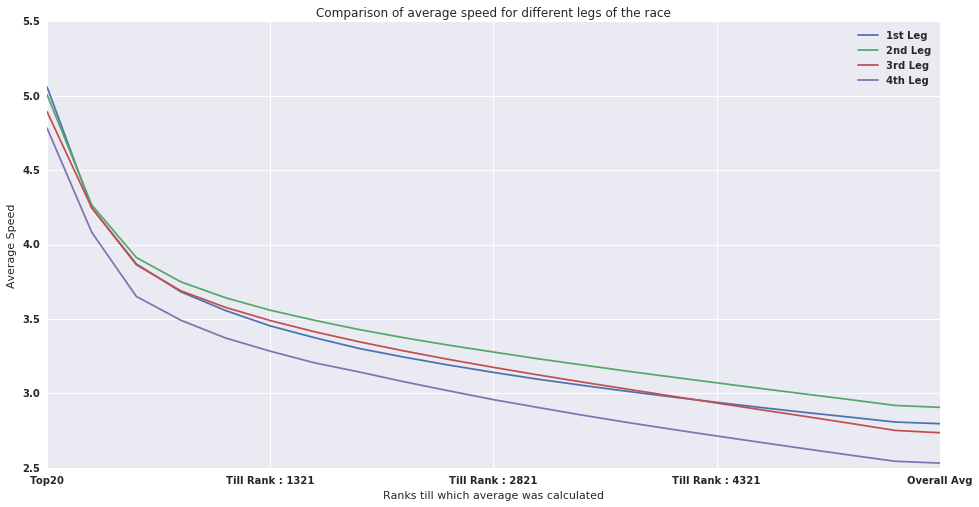

In [104]:
font = {'size'   : 32}
matplotlib.rc('font', **font)
ax = df_eval.plot(kind = 'line', figsize = (16, 8), title = 'Comparison of average speed for different legs of the race'
             , fontsize =  10)
ax.set_ylabel("Average Speed")
ax.set_xlabel("Ranks till which average was calculated")

Interestingly for every group other than the Top 20 average speed of the 2nd leg of the race i.e. the part between the 10Km mark point and half way mark is higher than the average speed for the first leg of the race.

Some notable points:
1. The professionals give there all from the start whereas normal people slowly build up their speeds
2. The variation in speed is very less for the professionals, this is something that is easy to understand

Next I will try and see if there are such variations in strategies adopted by people from different countries

In [58]:
df_reduced = df[['Country '] + cols]
Series_list = []
ColumnList = []
countries = df['Country '].unique()
for country in countries:
    Series_list.append(df_reduced[ df_reduced['Country '] == country][cols].mean())
    ColumnList.append(country)
df_eval = pd.concat(Series_list, axis = 1)
df_eval.columns = ColumnList
df_eval = df_eval.transpose()
df_eval['mean'] = df_eval.mean(axis = 1)
df_eval.sort_values(by='mean', ascending = False, inplace = True)
df_eval = df_eval.reset_index()
df_top10 = df_eval.loc[:9]
series_others = pd.Series({'index':'Others'})
series_others = series_others.append(df_eval.loc[10:,cols + ['mean']].mean())
df_top10 = df_top10.append(series_others, ignore_index = True)
df_top10 = df_top10.transpose()
df_top10.columns = df_top10.loc['index']
df_top10 = df_top10[df_top10.index != 'index']

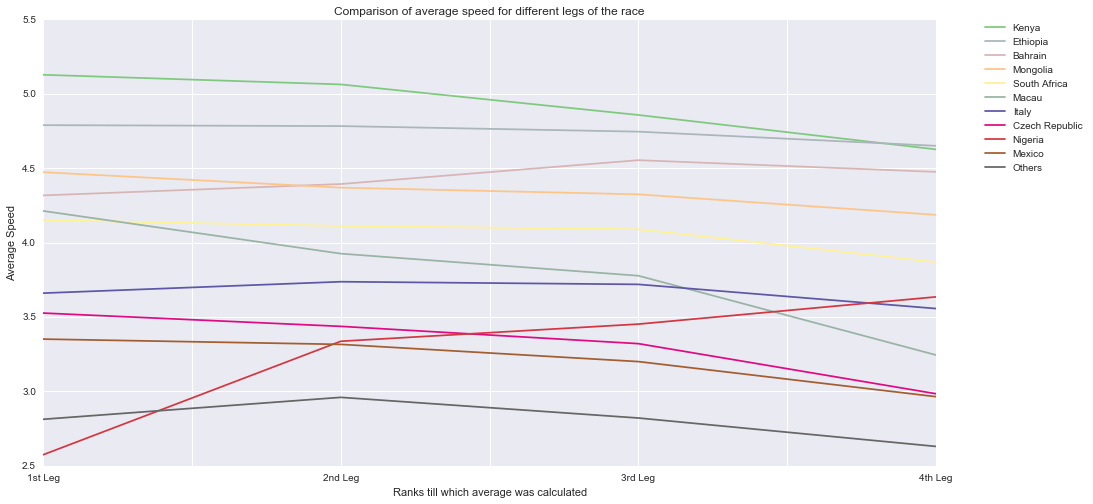

In [82]:
font = {'size'   : 32}
matplotlib.rc('font', **font)
ax = df_top10.loc['1st Leg':'4th Leg'].plot(kind = 'line', figsize = (16, 8),
                                            title = 'Comparison of average speed for different legs of the race'
                                             , fontsize =  10, colormap = 'Accent')
ax.set_ylabel("Average Speed")
ax.set_xlabel("Legs of the race")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The above graph show the average speed of people from the top 10 countries in terms of average speed of the contestants. 
A very interesting thing to see is that average speed of Nigerian Contestants (Red Line) kept increasing throughout the race.